     Stock        1928        1929        1930        1931        1932  \
0  S&P 500  143.811155  131.877782   98.745288   55.457774   50.664911   
1  T-Bills  103.080000  106.337328  111.175676  113.743835  114.960894   
2  T-Bonds  100.835471  105.074397  109.845753  107.034958  116.443660   

         1933        1934        1935        1936  ...           2009  \
0   75.988361   75.085189  110.180323  145.375676  ...  142344.873600   
1  116.064518  116.438826  116.642594  116.840887  ...    1967.287492   
2  118.604006  128.048968  133.775379  140.488061  ...    5344.645583   

            2010           2011           2012           2013           2014  \
0  163441.938600  166871.563000  193388.430900  255553.308100  290115.415000   
1    1969.844966    1970.435920    1971.421138    1972.722276    1973.767818   
2    5796.959405    6726.521265    6926.404686    6295.785407    6972.341867   

            2015           2016           2017           2018  
0  294115.792200  328742.

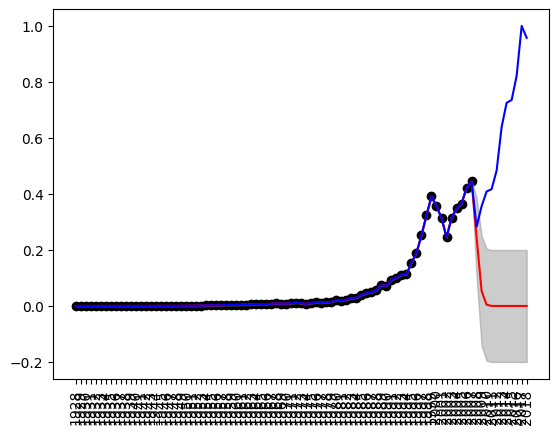

In [1]:
#IMPORT
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

#READ AND PREPROCESS
df=pd.read_csv('Market Returns 1928-2018.csv')

df.dropna(axis=0,inplace=True)

print(df)

#EXTRACTING COLUMNS
X=df.columns[1:]

Y=df.iloc[0,1:]
Y2 = Y.values.reshape(-1, 1)
scaler = MinMaxScaler()
Y1 = scaler.fit_transform(Y2)
# print(Y1)
x_train=X[:80]
y_train=Y1[:80]

X1=X.values.astype(float)
print(X1)
x_train1=x_train.values.astype(float)
y_train1=y_train.reshape(-1)

std = 0.1
length_scale = 1

def kernel(x1, x2):
    k_matrix = np.zeros((len(x1), len(x2)))
    for i in range(len(x1)):
        for j in range(len(x2)):
            k_matrix[i, j] = std**2 * np.exp(-0.5 * ((x1[i] - x2[j])**2) / (length_scale**2))
    return k_matrix

# print(kernel(dataset_t,dataset_t))

# X1 = [x for x in t if x not in dataset_t]
# # print(len(X1))
# F1=[x for x in y if x not in dataset_y]
# print(len(F1))

def mean_calc(x, x1, f):
    mean_x = np.mean(f)
    dot_ker = np.dot(kernel(x, x1).T, np.linalg.inv(kernel(x, x)))
    mean_star = np.dot(dot_ker,f)
    return mean_star
mean_calculated=mean_calc(x_train1, X1, y_train1)

print(mean_calculated)

X2=X1.reshape(-1,1)
plt.plot(X,mean_calculated,color='red')
plt.scatter(x_train,y_train1,color='black')
plt.plot(X,Y1,color='blue')



def var_calc(x, x1):
    dot1 = np.dot(kernel(x, x1).T, np.linalg.inv(kernel(x, x)))
    dot2 = np.dot(dot1, kernel(x, x1))
    var = kernel(x1, x1) - dot2
    var += np.eye(len(x1)) * 1e-6

    return var
variance_calculated = var_calc(x_train1, X1)
std_devs = np.sqrt(np.diag(variance_calculated))

plt.fill_between(X, mean_calculated -2* std_devs, mean_calculated +2* std_devs, color='gray', alpha=0.4)
plt.xticks(rotation="vertical")
plt.show()


     Stock        1928        1929        1930        1931        1932  \
0  S&P 500  143.811155  131.877782   98.745288   55.457774   50.664911   
1  T-Bills  103.080000  106.337328  111.175676  113.743835  114.960894   
2  T-Bonds  100.835471  105.074397  109.845753  107.034958  116.443660   

         1933        1934        1935        1936  ...           2009  \
0   75.988361   75.085189  110.180323  145.375676  ...  142344.873600   
1  116.064518  116.438826  116.642594  116.840887  ...    1967.287492   
2  118.604006  128.048968  133.775379  140.488061  ...    5344.645583   

            2010           2011           2012           2013           2014  \
0  163441.938600  166871.563000  193388.430900  255553.308100  290115.415000   
1    1969.844966    1970.435920    1971.421138    1972.722276    1973.767818   
2    5796.959405    6726.521265    6926.404686    6295.785407    6972.341867   

            2015           2016           2017           2018  
0  294115.792200  328742.

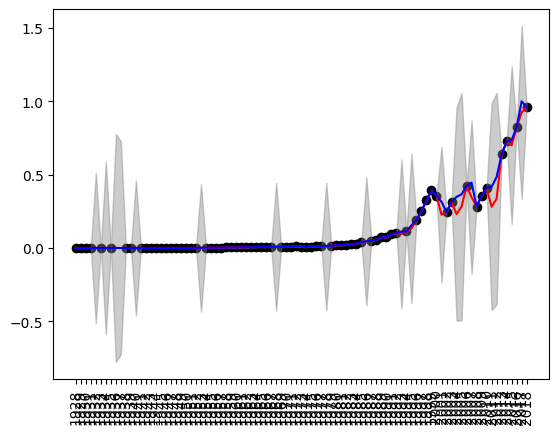

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

#READ AND PREPROCESS
df=pd.read_csv('Market Returns 1928-2018.csv')

df.dropna(axis=0,inplace=True)

print(df)

#EXTRACTING COLUMNS
X=df.columns[1:]

Y=df.iloc[0,1:]
Y2 = Y.values.reshape(-1, 1)
scaler = MinMaxScaler()
Y1 = scaler.fit_transform(Y2)
# print(Y1)
np.random.seed(3)
x_train,x_test,y_train,y_test=train_test_split(X,Y1,test_size=0.2)

X1=X.values.astype(float)
print(X1)
x_train1=x_train.values.astype(float)

y_train1=y_train.reshape(-1)


std = 0.5
length_scale = 1

def kernel(x1, x2):
    k_matrix = np.zeros((len(x1), len(x2)))
    for i in range(len(x1)):
        for j in range(len(x2)):
            k_matrix[i, j] = std**2 * np.exp(-0.5 * ((x1[i] - x2[j])**2) / (length_scale**2))
    return k_matrix

# print(kernel(dataset_t,dataset_t))

# X1 = [x for x in t if x not in dataset_t]
# # print(len(X1))
# F1=[x for x in y if x not in dataset_y]
# print(len(F1))

def mean_calc(x, x1, f):
    mean_x = np.mean(f)
    dot_ker = np.dot(kernel(x, x1).T, np.linalg.inv(kernel(x, x)))
    mean_star = np.dot(dot_ker,f)
    return mean_star
mean_calculated=mean_calc(x_train1, X1, y_train1)

print(mean_calculated)

X2=X1.reshape(-1,1)

def var_calc(x, x1):
    dot1 = np.dot(kernel(x, x1).T, np.linalg.inv(kernel(x, x)))
    dot2 = np.dot(dot1, kernel(x, x1))
    var = kernel(x1, x1) - dot2
    var += np.eye(len(x1)) * 1e-6

    return var
variance_calculated = var_calc(x_train1, X1)
std_devs = np.sqrt(np.diag(variance_calculated))

plt.plot(X,mean_calculated,color='red')
plt.scatter(x_train,y_train1,color='black')
plt.plot(X,Y1,color='blue')
plt.fill_between(X, mean_calculated -2* std_devs, mean_calculated +2* std_devs, color='gray', alpha=0.4)
plt.xticks(rotation="vertical")
plt.show()
